#### Dataset: ####

This script analyzes restaurant inspections data in New York City from November 2014 to January 2015. The dataset provides address of the restaurant with Street, Zipcode, and Boro columns. It lists the name of the restaurant in DBA column and type of food served in Cuision Description column. In Violation Code column, it shows the type of violation for the inspection. If null, it means there is no violation. it also provides other information such as grade date and inspection type.

In [2]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
df.head()

Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


In order to create a unique identifier for each restauarnt, I create a new columm called 'RESTAURANT' by concatenating restaurant name (DBA), building, street, and zipcode. Then I display those first 10 values.

In [7]:
df['RESTAURANT']=df['DBA']+' '+df['BUILDING']+' '+ df['STREET']+' '+ df['ZIPCODE']
df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

After creating unique restaurant identifier, I found the number of unique restaurants in the data set to be 10K.

In [8]:
len(df['RESTAURANT'].value_counts())

10114

There are some restaurants with multiple locations such as Wendy's. I want to find out how many chains are there in the dataset, which I define as having two or more locations with the same DBA name.

In [9]:
chain = df.drop_duplicates(subset='RESTAURANT')['DBA'].value_counts()
len(chain[chain>1])

368

Now I want to plot the Top 20 most popular chains.

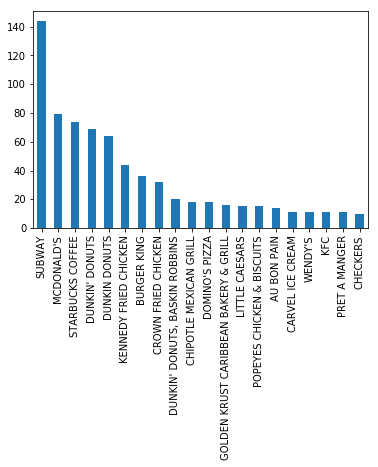

In [5]:
import matplotlib
rest = chain[chain>1]
rest[:20].plot(kind='bar')

Here I calculate the percentage of restaurants that are chains.

In [20]:
# float(sum(chain[chain>1].value_counts()))/sum(chain.value_counts())
sum(chain[chain>1]) * 1.0 / chain.sum()

0.16472216729286138

I also want to look at the restaurants that are not a chain and see where most of them are located. It turns out that Manhattan has the most.

C:\Users\lidu0\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


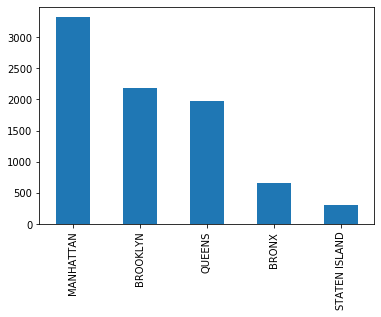

In [16]:
non_chain = chain[chain==1]
restaurant = df.drop_duplicates(subset='RESTAURANT')
def add_chain(row):
    if row['DBA'] in non_chain:
        return True
    else:
        return False
restaurant['NONCHAIN'] = restaurant.apply(add_chain, axis=1)
nonchaindf = restaurant[restaurant['NONCHAIN'] == True]
nonchaindf[nonchaindf['BORO'] != 'Missing']['BORO'].value_counts().plot(kind='bar')

Now the same for chain restaurants. It shows that there are more non-chain restaurants than chain restaurants in every borough.

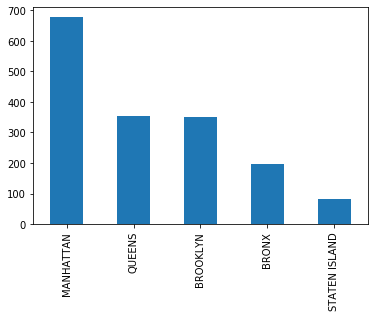

In [15]:
chaindf = restaurant[restaurant['NONCHAIN'] == False]
chaindf[chaindf['BORO'] != 'Missing']['BORO'].value_counts().plot(kind='bar')

Now I want to find out the percentage of non-chain restaurants in each borough. Brooklyn seems to have the most independent restaurants by percentage.

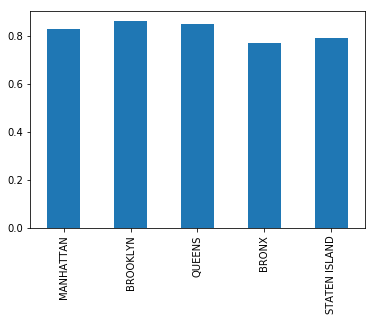

In [114]:
(nonchaindf[nonchaindf['BORO'] != 'Missing']['BORO'].value_counts()/restaurant[restaurant['BORO']!= 'Missing']['BORO'].value_counts()).plot(kind='bar')

Switching from chain, I want to look at the most popular cuisine type in New York City. Here I plot the Top 20 most popular cuisine types. American restaurants, as expected, are the most popular. It surprised me that Chinese is the second most popular category.

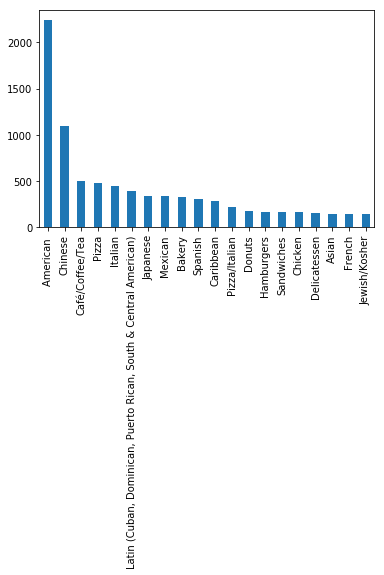

In [36]:
cuisine = restaurant['CUISINE DESCRIPTION'].value_counts()
cuisine[:20].plot(kind='bar')

With the violation data, I want to look at what cuisine does not have violation when being inspected. Here I find the Top 20 cuisines without being cited for violations.

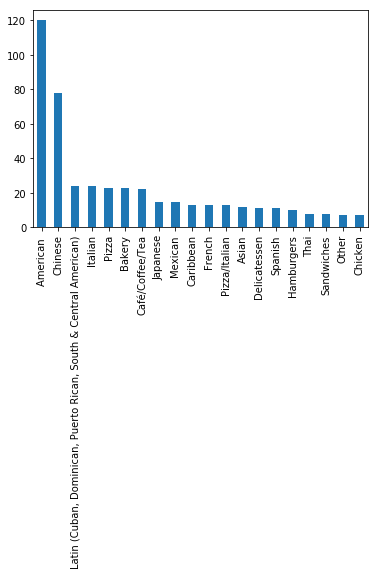

In [32]:
no_violations = df[df['VIOLATION CODE'].isnull()]
nv = no_violations.drop_duplicates(subset='RESTAURANT')
nv['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

I want to normalize the data so here I find the cuisine with more than 20 restaurants that has highest rate of passing restaurant inspections.

In [39]:
cuisine_count = df['CUISINE DESCRIPTION'].value_counts()
cc = cuisine_count[cuisine_count>20]
def add_20(row):
    if row['CUISINE DESCRIPTION'] in cc:
        return True
    else:
        return False
df['cc_over_twenty'] = df.apply(add_20, axis=1)
ccdf = df[df['cc_over_twenty'] == True]
ccdf_no_violations = ccdf[ccdf['VIOLATION CODE'].isnull()].drop_duplicates(subset='RESTAURANT')
answer = ccdf_no_violations['CUISINE DESCRIPTION'].value_counts()/cc
answer.sort_values(ascending=False)[:10]

Creole                0.040000
Chinese/Cuban         0.036364
Soups & Sandwiches    0.030769
Continental           0.028986
Other                 0.025547
Russian               0.022857
French                0.021667
Barbecue              0.020833
Bangladeshi           0.020134
Tapas                 0.020000
Name: CUISINE DESCRIPTION, dtype: float64

Now I want to look at the most common violations. It is interesting to see that across all boroughs non-food contact surface improperly constructed is the top violation.

In [176]:
df['DUMMY'] = 1
no_missing = df[df['BORO']!= 'Missing']
pivoted = pd.pivot_table(no_missing,
                         index='BORO',
                         columns='VIOLATION DESCRIPTION',
                         values='DUMMY',
                         aggfunc=sum)
pivoted.T.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

What is the most unique violation for each borough? Here I want to show what each borough has disproportionate amount of violations.

In [181]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
norm_pivoted = pivoted / violationFrequency
norm_pivoted.T.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object